In [ ]:
#Jéssica Fabiola Heredia Cimental
#Tarea II, Mecánica Analítica

c:\users\j. fabiola heredia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


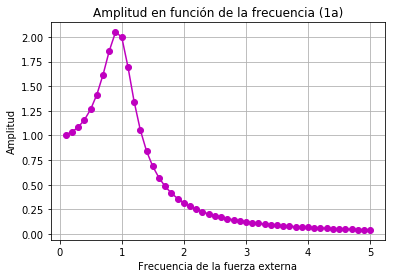

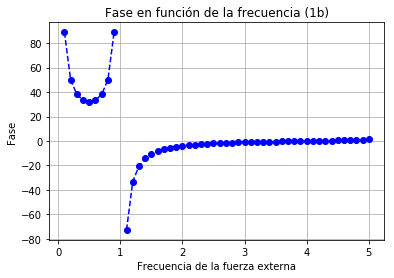

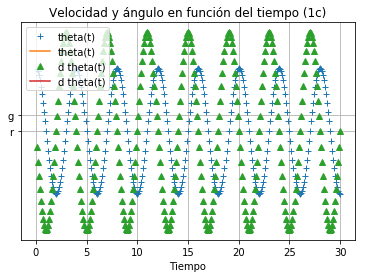

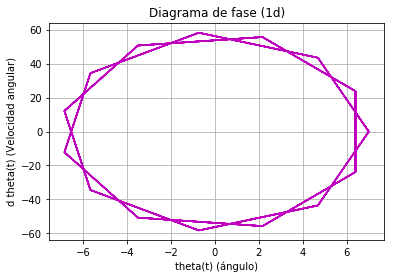

Comparación de diagramas de fase, utilizando diferente valor de A (1e)


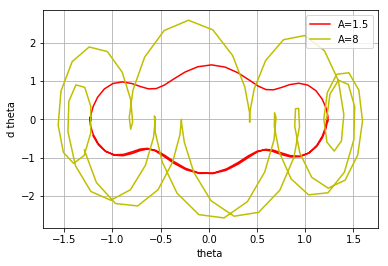

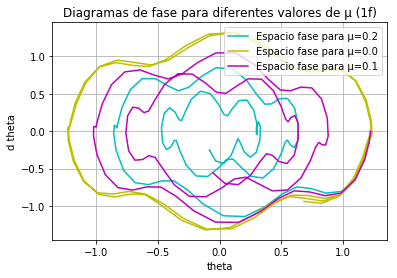

In [30]:
#Ejercicio 1
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

def amplitud(w, mu): 
    return 1  / (pow(w,4) + pow(w,2) * (pow(mu,2) - 2) + 1) ** 0.5

def fase(w, mu):
    return 1 / np.tan((w * pow(mu,2)) / 2 * (1 - w))

def angulo(t, A, omega):
    return A * np.cos(omega * t)

def velocidad(t, A, omega):
    return -A * omega * np.sin(omega * t)

def E1d(ye, t, miu, w, w0): #Función para el ejercicio 1d
    theta, omega = ye
    dyedt = [omega, A * np.cos(w * t) - miu * omega - pow(w0, 2) * np. sin(theta)]
    return dyedt

#Ejercicio 1f
#Se ocupa una variación de μ, se define una función para cada valor
def E1f1(yf1, t, miu1, w, w0):
    theta, omega = yf1
    dyf1dt = [omega, A * np.cos(w * t) - miu1 * omega - pow(w0, 2) * np. sin(theta)]
    return dyf1dt

def E1f2(yf2, t, miu2, w, w0):
    theta, omega = yf2
    dyf2dt = [omega, A * np.cos(w * t) - miu2 * omega - pow(w0, 2) * np. sin(theta)]
    return dyf2dt

def E1f3(yf3, t, miu3, w, w0):
    theta, omega = yf3
    dyf3dt = [omega, A * np.cos(w * t) - miu3 * omega - pow(w0, 2) * np. sin(theta)]
    return dyf3dt


#Inciso a, b
mu = 0.5
c = 1
w = c / 10
lisw = [] 
Amplitud = []
Fase = []

#Obtención de datos ejercicio 1a, 1b
while w <= 5:
    lisw.append(w)
    amplitud(w, mu)
    Amplitud.append(amplitud(w, mu))
    fase(w, mu) 
    Fase.append(fase(w, mu))
    c = c + 1
    w = c / 10


#Grafica ejercicio 1a
plt.plot(lisw, Amplitud, marker='o', linestyle='-', color='m')
plt.title("Amplitud en función de la frecuencia (1a)")
plt.xlabel("Frecuencia de la fuerza externa")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

#Grafica ejercicio 1b
plt.plot(lisw, Fase, marker='o', linestyle='--', color='b')
plt.title("Fase en función de la frecuencia (1b)")
plt.xlabel("Frecuencia de la fuerza externa")
plt.ylabel("Fase")
plt.grid()
plt.show()

#Ejercicio 1c
A = 4
omega = np.pi / 2
d = 1
t = d / 10
time = []
angle = []
velocity = []

while t <= 30:
    time.append(t)
    angulo(t, A, omega)
    angle.append(angulo(t, A, omega))
    velocidad(t, A, omega)
    velocity.append(velocidad(t, A, omega))
    d = d + 1
    t = d / 10
    
plt.plot(time, angle, '+', 'r', label='theta(t)')
plt.plot(time, velocity, '^', 'g', label='d theta(t)') 
plt.title("Velocidad y ángulo en función del tiempo (1c)")
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.grid()
plt.show()

#Ejercicio 1d
A = 7
omega = 8 * np.pi / 3
c = 1
t = c / 10
time = []
angle = []
velocity = []

while t <= 10:
    time.append(t)
    angulo(t, A, omega)
    angle.append(angulo(t, A, omega))
    velocidad(t, A, omega)
    velocity.append(velocidad(t, A, omega))
    c = c + 1
    t = c / 10


plt.plot(angle, velocity, linestyle='--', color='m')
plt.title('Diagrama de fase (1d)')
plt.xlabel('theta(t) (ángulo)')
plt.ylabel('d theta(t) (Velocidad angular)')
plt.grid()
plt.show()

#Ejercicio 1e, primera variación de A
miu = 0 
w = 2 * np.pi
w0 = 1 
A = 1.5

ye = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
te = np.linspace(0, 10, 100)
sole1 = odeint(E1d, ye, te, args=(miu, w, w0))

#Segunda variación de A
miu = 0 
w = 2 * np.pi
w0 = 1 
A = 8

ye = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
te = np.linspace(0, 10, 100)
sole2 = odeint(E1d, ye, te, args=(miu, w, w0))

print('Comparación de diagramas de fase, utilizando diferente valor de A (1e)')
plt.plot(sole1[:, 0], sole1[:, 1], 'r', label='A=1.5')
plt.plot(sole2[:, 0], sole2[:, 1], 'y', label='A=8')
plt.legend(loc='best')
plt.xlabel('theta')
plt.ylabel('d theta')
plt.grid()
plt.show()

#Ejercicio 1f

w = 2 * np.pi
w0 = 1 
A = 1

miu1 = 0.2 

yf1 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
tf1 = np.linspace(0, 15, 100)
solf1 = odeint(E1f1, yf1, tf1, args=(miu1, w, w0))

miu2=0.0

yf2 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
tf2 = np.linspace(0, 15, 100)
solf2 = odeint(E1f2, yf2, tf2, args=(miu2, w, w0))

miu3 = 0.1

yf3 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
tf3 = np.linspace(0, 15, 100)
solf3 = odeint(E1f3, yf3, tf3, args=(miu3, w, w0))


plt.plot(solf1[:, 0], solf1[:, 1], 'c', label='Espacio fase para μ=0.2')
plt.plot(solf2[:, 0], solf2[:, 1], 'y', label='Espacio fase para μ=0.0')
plt.plot(solf3[:, 0], solf3[:, 1], 'm', label='Espacio fase para μ=0.1')
plt.legend(loc='best')
plt.title('Diagramas de fase para diferentes valores de μ (1f)')
plt.xlabel('theta')
plt.ylabel('d theta')
plt.grid()
plt.show()

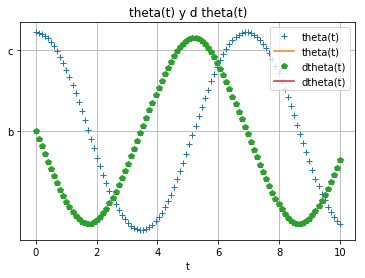

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
#Ejercicio 2. Ecuación no lineal no forzada sin amortiguamiento
#Inciso a

# EDO: theta''(t) + sin(theta(t)) = 0
# Reducción de orden: theta'=omega; omega'= theta''(t)
# Reescribiendo la EDO: omega'(t) + sin(theta(t))
def ejer2a(y, t):
    theta, dtheta = y 
    dydt = [dtheta, -np.sin(theta)] 
    return dydt


y0 = [70 * np.pi / 180, 0.0] #Condiciones iniciales theta(t=0)=70° (se cambia a radianes), segunda condición theta'(t)=0
t2 = np.linspace(0, 10, 100) #Rango para graficar y número de pasos
sol2 = odeint(ejer2a, y0, t2) #Utilizamos la función odeint para resolver númericamente la EDO 

plt.plot(t2, sol2[:, 0], '+', 'b', label='theta(t)') #Grafico de theta
plt.plot(t2, sol2[:, 1], 'p', 'c', label='dtheta(t)') #Grafico de omega
plt.title("theta(t) y d theta(t)")
plt.legend(loc='best') #Localización del cuadro de texto en la grpafica
plt.xlabel('t') #Nombramos el eje t
plt.grid() #Gradilla
plt.show() #Se muestra la grafica automaticamente




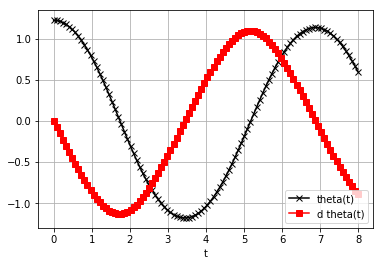

Para ver la diferencia entre la gráfica del ejercicio 2a, cambie el valor de μ


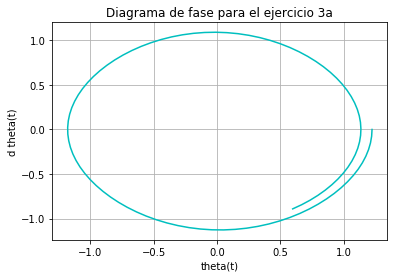

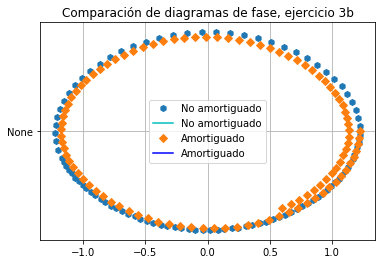

EXTRA. Tomando los mismos valores pero con μ=1.4, obtenemos:


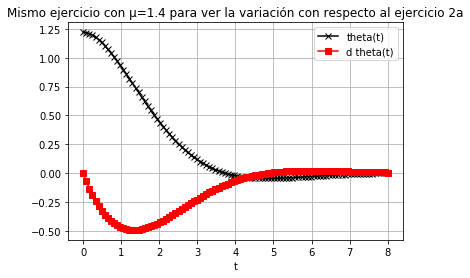

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
#Ejercicio 3, inciso a

#EDO: theta''(t) + mu*theta'(t) + w*sin(theta) = 0
#Reducción de orden: theta'(t)=omega, theta''(t)=omega'
#Reescribiendo EDO: omega'(t) + m*omega(t) + w*Sin(theta(t)) = 0
def ejer3a(y3, t, m, w):
    theta, omega = y3
    dy3dt = [omega, -m * omega - w * np.sin(theta)]
    return dy3dt

def ejer2a(y, t):
    theta, dtheta = y 
    dydt = [dtheta, -np.sin(theta)] 
    return dydt


w = 1
m = 0.02

y0 = [70 * np.pi / 180, 0.0] #Condiciones iniciales theta(t=0)=70° (se cambia a radianes), segunda condición theta'(t)=0
t2 = np.linspace(0, 10, 100) #Rango para graficar y número de pasos
sol2 = odeint(ejer2a, y0, t2) #Utilizamos la función odeint para resolver númericamente la EDO 

y3 = [70 * np.pi / 180, 0.0] 
t3 = np.linspace(0, 8, 100) 
sol3 = odeint(ejer3a, y3, t3, args=(m, w)) 

plt.plot(t3, sol3[:, 0], marker='x', color='k', label='theta(t)') 
plt.plot(t3, sol3[:, 1], marker='s', color='r', label='d theta(t)') 
plt.legend(loc='best') 
plt.xlabel('t')
plt.grid()
plt.show()
print('Para ver la diferencia entre la gráfica del ejercicio 2a, cambie el valor de μ')

plt.plot(sol3[:, 0], sol3[:, 1], 'c')
plt.title('Diagrama de fase para el ejercicio 3a')
plt.xlabel('theta(t)')
plt.ylabel('d theta(t)')
plt.grid()
plt.show()

#Ejercicio 3, inciso b
plt.plot(sol2[:, 0], sol2[:, 1], 'h', 'None', 'c', label='No amortiguado')
plt.plot(sol3[:, 0], sol3[:, 1], 'D', 'None', 'b', label='Amortiguado')
plt.legend(loc='best')
plt.title('Comparación de diagramas de fase, ejercicio 3b')
plt.grid()
plt.show()

print('EXTRA. Tomando los mismos valores pero con μ=1.4, obtenemos:')
w = 1
m = 1.4

y3 = [70 * np.pi / 180, 0.0] 
t3 = np.linspace(0, 8, 100) 
sol3 = odeint(ejer3a, y3, t3, args=(m, w)) 

plt.plot(t3, sol3[:, 0], marker='x', color='k', label='theta(t)') 
plt.plot(t3, sol3[:, 1], marker='s', color='r', label='d theta(t)')
plt.legend(loc='best') 
plt.title('Mismo ejercicio con μ=1.4 para ver la variación con respecto al ejercicio 2a')
plt.xlabel('t')
plt.grid()
plt.show()


Ejercicio 4a. Variación I


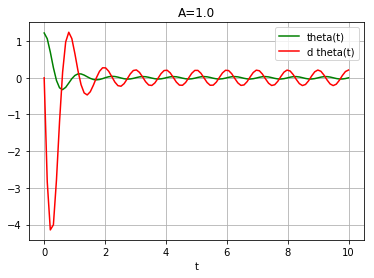

Diagrama de fase


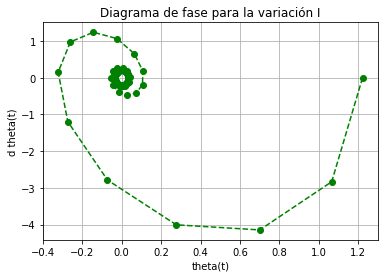

Ejercicio 4a. Variación II


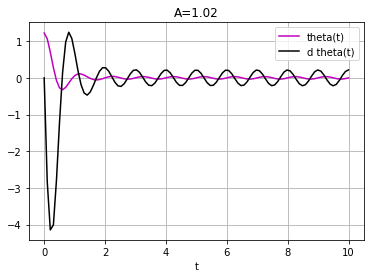

Diagrama de fase


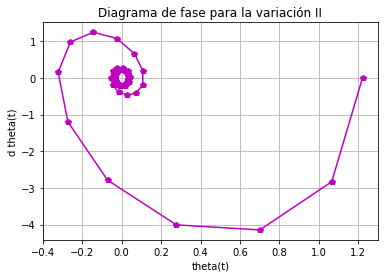

Ejercicio 4a. Variación III


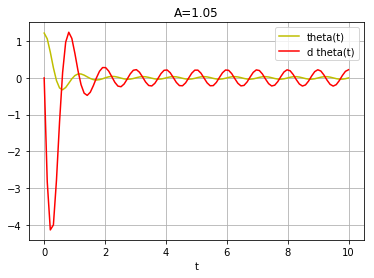

Diagrama de fase


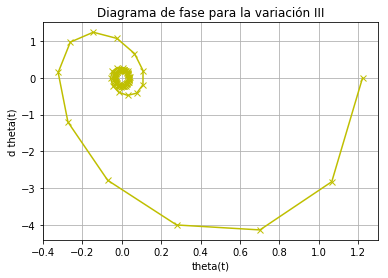

Ejercicio 4a. Variación IV


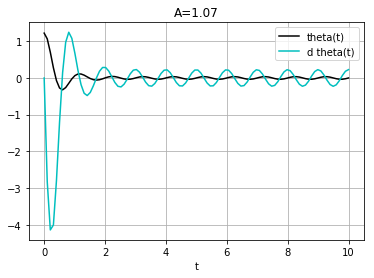

Diagrama de fase


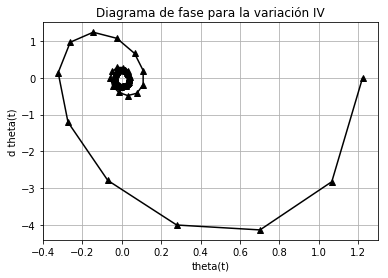

Ejercicio 4a. Variación V


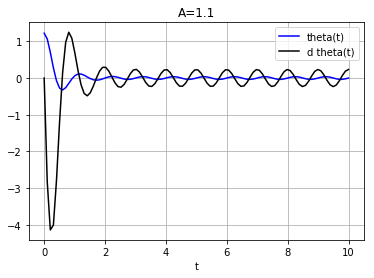

Diagrama de fase


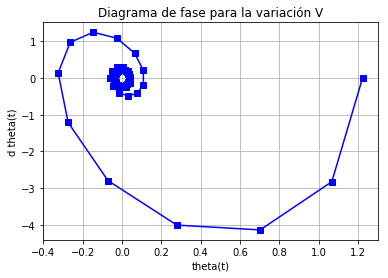

EXTRA: ¿Qué pasa cuando A = 2?
Variación extra


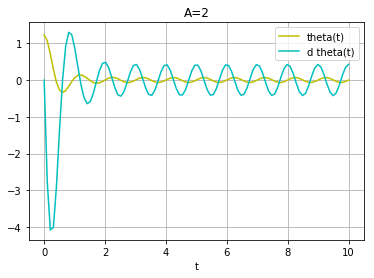

Diagrama de fase


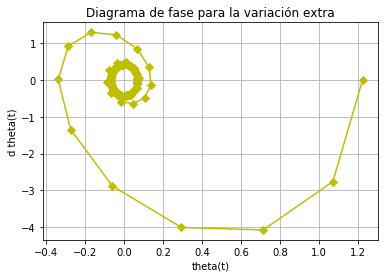

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
#Ejercicio 4a
    
#EDO: theta''(t) + mu*theta'(t) + w0*Sin(theta) = ACos(wt)
#Reduccioón de orden: theta'(t)=omega, theta''(t)=omega'
#Reescribiendo EDO: omega'(t) + mu*omega(t) + w0*Sin(theta) = ACos(wt)
def ejer4a(y3, t, miu, w, w0):
    theta, omega = y3
    dy3dt = [omega, A * np.cos(w * t) - miu * omega - pow(w0, 2) * np. sin(theta)]
    return dy3dt


#Primera variación de A
miu = 3 * np.pi / 2
w = 2 * np.pi
w0 = 2 * np.pi 
A = 1

y4 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
t4 = np.linspace(0, 10, 100)
sol4 = odeint(ejer4a, y4, t4, args=(miu, w, w0))

print('Ejercicio 4a. Variación I')
plt.plot(t4, sol4[:, 0], 'g', label='theta(t)') #Grafico de theta
plt.plot(t4, sol4[:, 1], 'r', label='d theta(t)') #Grafico de omega= theta'
plt.legend(loc='best')
plt.title("A=1.0")
plt.xlabel('t')
plt.grid()
plt.show()

print('Diagrama de fase')
plt.plot(sol4[:, 0], sol4[:, 1], marker='o', linestyle='--', color='g')
plt.title('Diagrama de fase para la variación I')
plt.xlabel('theta(t)')
plt.ylabel('d theta(t)')
plt.grid()
plt.show()

#Segunda variación de A
miu = 3 * np.pi / 2
w = 2 * np.pi
w0 = 2 * np.pi 
A = 1.02

y4 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
t4 = np.linspace(0, 10, 100)
sol4 = odeint(ejer4a, y4, t4, args=(miu, w, w0))

print('Ejercicio 4a. Variación II')
plt.plot(t4, sol4[:, 0], 'm', label='theta(t)') #Grafico de theta
plt.plot(t4, sol4[:, 1], 'k', label='d theta(t)') #Grafico de omega= theta'
plt.legend(loc='best')
plt.title("A=1.02")
plt.xlabel('t')
plt.grid()
plt.show()

print('Diagrama de fase')
plt.plot(sol4[:, 0], sol4[:, 1], marker='p', linestyle='-', color='m')
plt.title('Diagrama de fase para la variación II')
plt.xlabel('theta(t)')
plt.ylabel('d theta(t)')
plt.grid()
plt.show()

#Tercera variación de A
miu = 3 * np.pi / 2
w = 2 * np.pi
w0 = 2 * np.pi 
A = 1.05

y4 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
t4 = np.linspace(0, 10, 100)
sol4 = odeint(ejer4a, y4, t4, args=(miu, w, w0))

print('Ejercicio 4a. Variación III')
plt.plot(t4, sol4[:, 0], 'y', label='theta(t)') #Grafico de theta
plt.plot(t4, sol4[:, 1], 'r', label='d theta(t)') #Grafico de omega= theta'
plt.legend(loc='best')
plt.title("A=1.05")
plt.xlabel('t')
plt.grid()
plt.show()

print('Diagrama de fase')
plt.plot(sol4[:, 0], sol4[:, 1], marker='x', linestyle='-', color='y')
plt.title('Diagrama de fase para la variación III')
plt.xlabel('theta(t)')
plt.ylabel('d theta(t)')
plt.grid()
plt.show()

#Cuarta variación de A
miu = 3 * np.pi / 2
w = 2 * np.pi
w0 = 2 * np.pi 
A = 1.07

y4 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
t4 = np.linspace(0, 10, 100)
sol4 = odeint(ejer4a, y4, t4, args=(miu, w, w0))

print('Ejercicio 4a. Variación IV')
plt.plot(t4, sol4[:, 0], 'k', label='theta(t)') #Grafico de theta
plt.plot(t4, sol4[:, 1], 'c', label='d theta(t)') #Grafico de omega= theta'
plt.legend(loc='best')
plt.title("A=1.07")
plt.xlabel('t')
plt.grid()
plt.show()

print('Diagrama de fase')
plt.plot(sol4[:, 0], sol4[:, 1], marker='^', linestyle='-', color='k')
plt.title('Diagrama de fase para la variación IV')
plt.xlabel('theta(t)')
plt.ylabel('d theta(t)')
plt.grid()
plt.show()

#Quinta variación de A
miu = 3 * np.pi / 2
w = 2 * np.pi
w0 = 2 * np.pi 
A = 1.1

y4 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
t4 = np.linspace(0, 10, 100)
sol4 = odeint(ejer4a, y4, t4, args=(miu, w, w0))

print('Ejercicio 4a. Variación V')
plt.plot(t4, sol4[:, 0], 'b', label='theta(t)') #Grafico de theta
plt.plot(t4, sol4[:, 1], 'k', label='d theta(t)') #Grafico de omega= theta'
plt.legend(loc='best')
plt.title("A=1.1")
plt.xlabel('t')
plt.grid()
plt.show()

print('Diagrama de fase')
plt.plot(sol4[:, 0], sol4[:, 1], marker='s', linestyle='-', color='b')
plt.title('Diagrama de fase para la variación V')
plt.xlabel('theta(t)')
plt.ylabel('d theta(t)')
plt.grid()
plt.show()

print('EXTRA: ¿Qué pasa cuando A = 2?')
#Variación extra
miu = 3 * np.pi / 2
w = 2 * np.pi
w0 = 2 * np.pi 
A = 2

y4 = [70 * np.pi / 180, 0.0] #Mismas condiciones iniciales
t4 = np.linspace(0, 10, 100)
sol4 = odeint(ejer4a, y4, t4, args=(miu, w, w0))

print('Variación extra')
plt.plot(t4, sol4[:, 0], 'y', label='theta(t)') #Grafico de theta
plt.plot(t4, sol4[:, 1], 'c', label='d theta(t)') #Grafico de omega= theta'
plt.legend(loc='best')
plt.title("A=2")
plt.xlabel('t')
plt.grid()
plt.show()

print('Diagrama de fase')
plt.plot(sol4[:, 0], sol4[:, 1], marker='D', linestyle='-', color='y')
plt.title('Diagrama de fase para la variación extra')
plt.xlabel('theta(t)')
plt.ylabel('d theta(t)')
plt.grid()
plt.show()

